# Оформление графиков в Matplotlib

Рассмотрим различные способы изменения оформления графиков.
Важно уметь это делать, чтобы с лёгкостью удовлетворять требованиям различных редакций и стандартов на оформление текстовых работ, например, требованиям кафедры СМ6 МГТУ им. Н.Э. Баумана.

В конце раздела рассматривается создание файла с собственными стилевыми настройками matplotlib.
Сформированный стиль вполне удовлетворяет требованиям кафедры СМ6, поэтому студенты СМ6 могут использовать этот файл в своих работах (домашних, курсовых и прочих).

Для начала выполним некоторую рутину:

In [1]:
import matplotlib.pyplot as plt
import numpy as np

Будем строить тригонометрические функции:

In [2]:
x = np.linspace(-np.pi, np.pi, 201)
sin_x = np.sin(x)
cos_x = np.cos(x)

## Использование готовых стилей

Построим график, оформленный в стиле "по умолчанию":

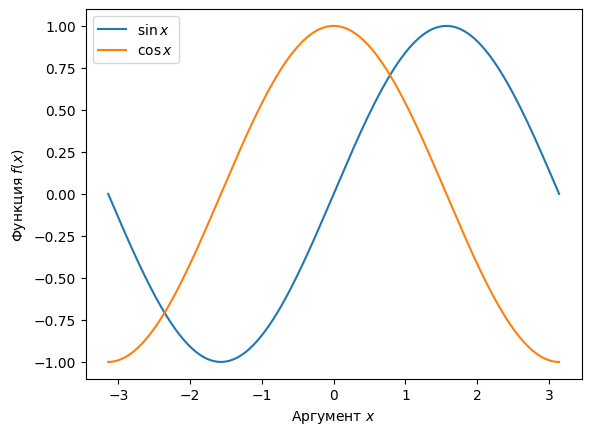

In [3]:
fig, ax = plt.subplots()
ax.plot(x, sin_x, label=r"$\sin{x}$")
ax.plot(x, cos_x, label=r"$\cos{x}$")
ax.set(xlabel="Аргумент $x$", ylabel="Функция $f(x)$")
ax.legend();

В Matplotlib имеется [целый ряд встроенных стилей графиков](https://matplotlib.org/stable/gallery/style_sheets/style_sheets_reference.html).
Назначить их можно, например, используя менеджер контекста `with` и функцию [`pyplot.style.context`](https://matplotlib.org/stable/api/style_api.html) с указанием названия стиля:

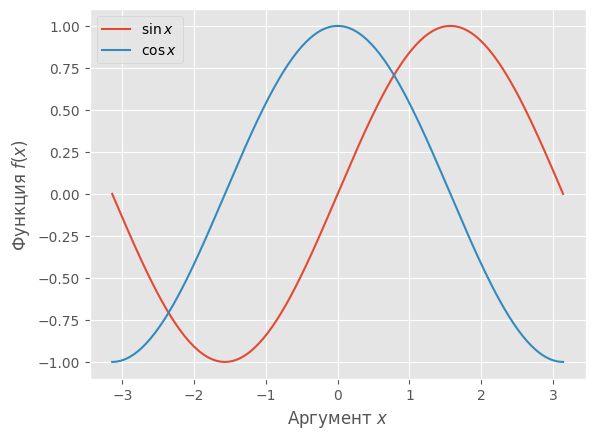

In [4]:
with plt.style.context("ggplot"):
    fig, ax = plt.subplots()
    ax.plot(x, sin_x, label=r"$\sin{x}$")
    ax.plot(x, cos_x, label=r"$\cos{x}$")
    ax.set(xlabel="Аргумент $x$", ylabel="Функция $f(x)$")
    ax.legend()
    plt.show()

Также внутри менеджера контекста с заданным стилем matplotlib можно вызвать собственную функцию построения графика.
Сведём построение наших синусов-косинусов в отдельную функцию, как делали в разделе {doc}`improved-matplotlib`:

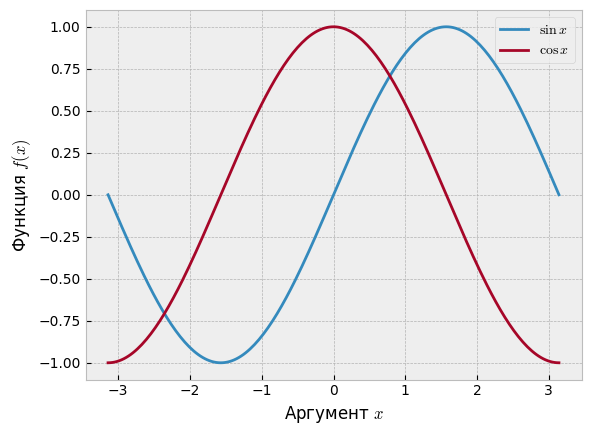

In [5]:
def plot_sincos(x, figax=None):
    sin_x = np.sin(x)
    cos_x = np.cos(x)
    fig, ax = plt.subplots() if figax is None else figax
    ax.plot(x, sin_x, label=r"$\sin{x}$")
    ax.plot(x, cos_x, label=r"$\cos{x}$")
    return fig, ax

# И вызовем её в стилевом контексте
with plt.style.context("bmh"):
    fig, ax = plot_sincos(x)
    ax.set(xlabel="Аргумент $x$", ylabel="Функция $f(x)$")
    ax.legend()
    plt.show()

```{note}
Заметьте, что меняется оформление как обычного текста, так и математических выражений, обрамлённых долларами `$...$`.
```

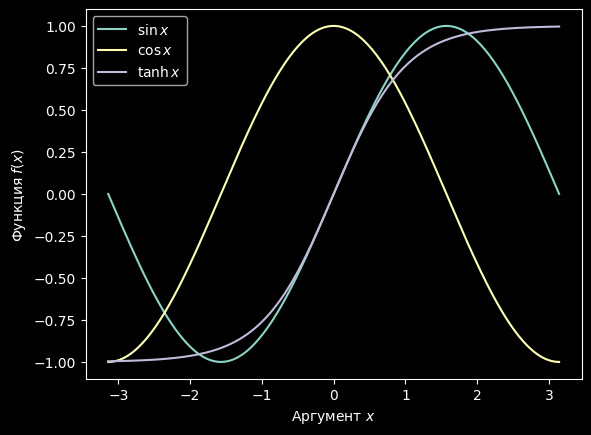

In [6]:
# Или в тёмном стиле
with plt.style.context("dark_background"):
    fig, ax = plot_sincos(x)
    # И можем изменить полученный график, например,
    # добавив график новой функции
    ax.plot(x, np.tanh(x), label=r"$\tanh{x}$")
    ax.set(xlabel="Аргумент $x$", ylabel="Функция $f(x)$")
    ax.legend()
    plt.show()

Использовать стилевой контекст просто и удобно.
Однако есть и подход назначения _глобального стиля_ для графиков matplotlib.

## Глобальная настройка стиля

Данный подход менее универсален, чем подход стилевого контекста, однако его удобнее применять в работах, в которых вы изначально имеете чёткие требования к оформлению.

### Функция `plt.style.use`

Глобальный стиль можно задать так:

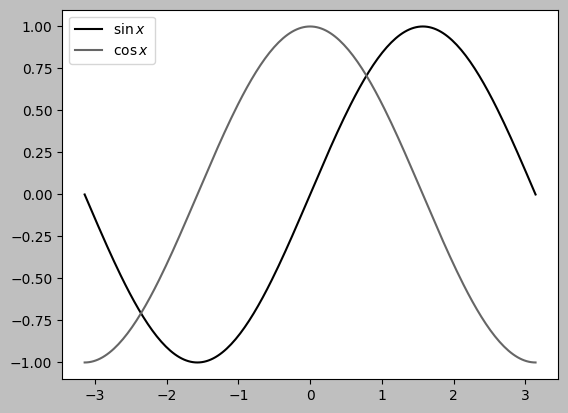

In [7]:
# В начале файла с кодом
plt.style.use("grayscale")

# И просто строим график без всякого контекста
_, ax = plot_sincos(x)
ax.legend();

### Изменение глобальной переменной `matplotlib.rcParams`

Для начала вернём стиль по умолчанию:

In [8]:
plt.style.use("default")

Matplotlib хранит настройки стилей в специальных текстовых файлах с расширением `.mplstyle`.
При импортировании библиотеки происходит считывание файла с настройками по умолчанию и сохранение этих настроек в глобальном Python-словаре [`matplotlib.rcParams`](https://matplotlib.org/stable/users/explain/customizing.html) (по ссылке найдёте описание всех настраиваемых параметров).
Вот, для примера, его содержимое:

In [9]:
import matplotlib as mpl
mpl.rcParams

RcParams({'_internal.classic_mode': False,
          'agg.path.chunksize': 0,
          'animation.bitrate': -1,
          'animation.codec': 'h264',
          'animation.convert_args': ['-layers', 'OptimizePlus'],
          'animation.convert_path': 'convert',
          'animation.embed_limit': 20.0,
          'animation.ffmpeg_args': [],
          'animation.ffmpeg_path': 'ffmpeg',
          'animation.frame_format': 'png',
          'animation.html': 'none',
          'animation.writer': 'ffmpeg',
          'axes.autolimit_mode': 'data',
          'axes.axisbelow': 'line',
          'axes.edgecolor': 'black',
          'axes.facecolor': 'white',
          'axes.formatter.limits': [-5, 6],
          'axes.formatter.min_exponent': 0,
          'axes.formatter.offset_threshold': 4,
          'axes.formatter.use_locale': False,
          'axes.formatter.use_mathtext': False,
          'axes.formatter.useoffset': True,
          'axes.grid': False,
          'axes.grid.axis': 'both',
   

Количество настраиваемых параметров впечатляет.
Но к концу раздела мы сформируем собственный файл настроек, и вы убедитесь, насколько легко это на самом деле.

In [10]:
# Это обычный словарь, а значит, можно читать данные
mpl.rcParams["axes.edgecolor"]

'black'

Можно изменять данные в этом словаре.
Это изменит стиль графиков глобальным образом (рубрика "_Вредные советы_"):

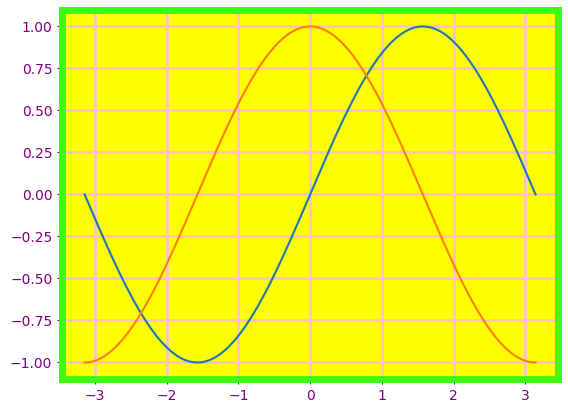

In [11]:
# Сделаем оси ядовито-зелёного цвета
mpl.rcParams["axes.edgecolor"] = "#40fd14"
# И утолстим их
mpl.rcParams["axes.linewidth"] = 5
# А ещё сделаем фиолетовые числовые метки на осях
mpl.rcParams["xtick.color"] = "purple"
mpl.rcParams["ytick.color"] = "purple"
# И розовую сетку
mpl.rcParams["grid.color"] = "pink"
mpl.rcParams["grid.linewidth"] = 2
mpl.rcParams["axes.grid"] = True
# Ну и жёлтый фон - куда же без него)
mpl.rcParams["axes.facecolor"] = "yellow"

# И просто построим график
plot_sincos(x);

```{toggle} Реакция любого вашего читателя (даже самого преданного)...
:show:

![Бедный читатель...](pics/cat_bruh.gif)
```

```{warning}
Кстати, вы изменили поведение любого стиля, т.к. изменили глобальную переменную `mpl.rcParams`.
Это нехорошо.
Нужно бы вернуть всё, как было.
К счастью, сделать это в программе гораздо проще, чем в жизни:
```

In [12]:
# Если и делать такое, то строго так
plt.style.use("default")
mpl.rcParams = mpl.rcParamsDefault.copy()

Разумеется, не стоит _так_ оформлять свои графики.
Также не стоит менять оформление через изменение `mpl.rcParams` - это крайне неудобно в реальных проектах.
Выход есть - использовать собственный файл настроек.

## Файл собственных настроек стиля

Назовём наш файл с настройками `sciart.mplstyle`.
Это обычный текстовый файл, который определённым образом интерпретируется (считывается) пакетом matplotlib.
Выглядит он просто:

```
# <- этот символ означает комментарий, как и в Python

# Настраиваем шрифт

# - обычный
font.family:    serif
font.size:      12.0
font.serif:     Times New Roman

# - в математических выражениях                                                     
mathtext.fontset:   stix
mathtext.bf:        serif:bold
mathtext.bfit:      serif:italic:bold
mathtext.it:        serif:italic
mathtext.rm:        serif

# Настраиваем оси

# - 2D
axes.linewidth: 1.0
axes.grid:      True
axes.labelsize: large

# - 3D
axes3d.xaxis.panecolor: (1, 1, 1, 0.5)
axes3d.yaxis.panecolor: (1, 1, 1, 0.5)
axes3d.zaxis.panecolor: (1, 1, 1, 0.5)

# Числовые метки осей
xtick.major.size:   4.0
xtick.major.width:  1.0
ytick.major.size:    4.0
ytick.major.width:   1.0

# Сетка
grid.linestyle: :

# Легенда
legend.fancybox:    False
legend.fontsize:    medium

# Слегка подстраиваем различные типы графиков
image.origin: lower
hist.bins: auto
scatter.marker: .

# Параметры сохранения по умолчанию
savefig.dpi:         300
savefig.format:      tiff
savefig.bbox:        tight
```

Настроек гораздо больше, указали мы далеко не все.
Однако неуказанные настройки будут взяты из `mpl.rcParams`.

Добавьте этот файл в свой проект и с лёгкостью получайте кастомное оформление либо через контекстный стиль, либо через глобальную настройку:

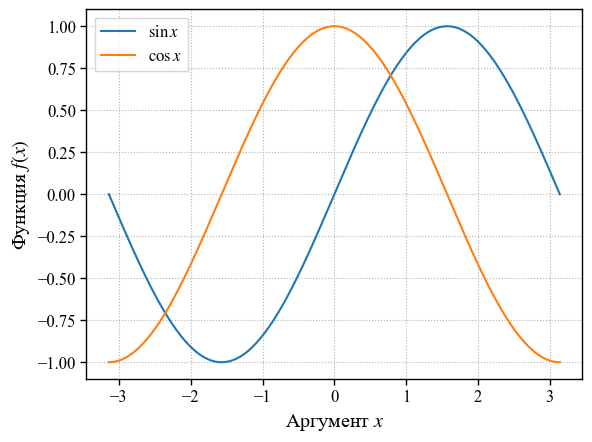

In [13]:
# Используем контекст
with plt.style.context("sciart.mplstyle"):
    _, ax = plot_sincos(x)
    ax.set(xlabel="Аргумент $x$", ylabel="Функция $f(x)$")
    ax.legend()
    plt.show()

```{important}
Важно, чтобы используемый вами шрифт (в данном случае Times New Roman) был системным.
```

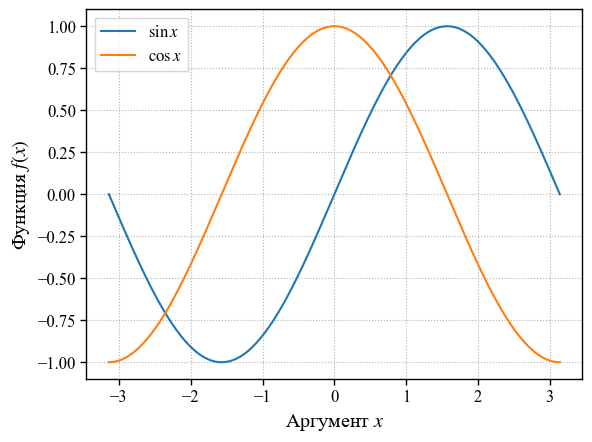

In [14]:
# Или через глобальную установку
plt.style.use("sciart.mplstyle")

_, ax = plot_sincos(x)
ax.set(xlabel="Аргумент $x$", ylabel="Функция $f(x)$")
ax.legend()
plt.show()

## Комбинация стилей

А что, если в качестве стиля указать несколько различных стилей?

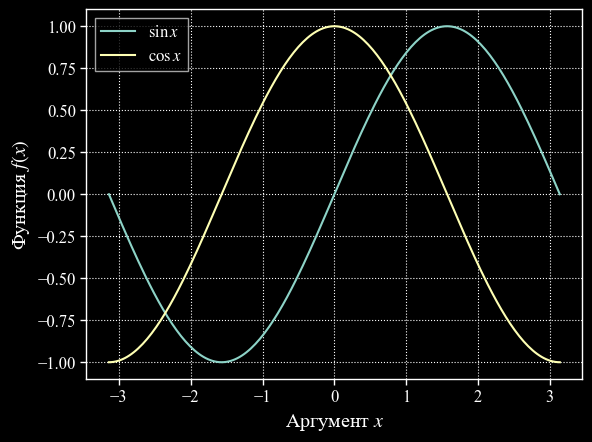

In [15]:
with plt.style.context(["dark_background", "sciart.mplstyle"]):
    _, ax = plot_sincos(x)
    ax.set(xlabel="Аргумент $x$", ylabel="Функция $f(x)$")
    ax.legend()
    plt.show()

Чудесным образом мы получили оформление `"dark_background"`, некоторые настройки которого перезаписаны нашим собственным стилем `"sciart.mplstyle"`.

Но и это ещё не всё.
Что насчёт чтения настроек стиля прямиком из репозитория в интернете?

## Стиль из интернета

Для того, чтобы получить стиль из любого файла `.mplstyle`, находящегося где-то в сети, достаточно вместо имени стиля (типа `"ggplot"`)  или пути к файлу с настройками (типа `"sciart.mplstyle"`) указать его URL:

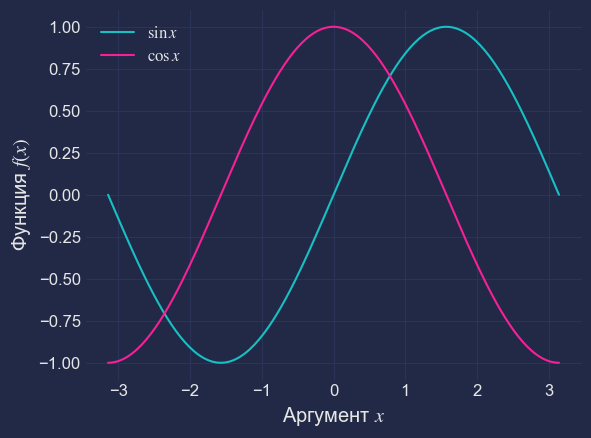

In [16]:
# Например, так
with plt.style.context("https://github.com/dhaitz/matplotlib-stylesheets/raw/master/pitayasmoothie-dark.mplstyle"):
    _, ax = plot_sincos(x)
    ax.set(xlabel="Аргумент $x$", ylabel="Функция $f(x)$")
    ax.legend()
    plt.show()

Настолько Matplotlib функционален.

## См. также

1. [Список стандартных стилей Matplotlib.](https://matplotlib.org/stable/gallery/style_sheets/style_sheets_reference.html)
2. [Всё о кастомизации Matplotlib...](https://matplotlib.org/stable/users/explain/customizing.html)
3. [И даже больше.](https://python-charts.com/matplotlib/styles/)